# Heathcare

DESCRIPTION

Problem Statement
NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
Build a model to accurately predict whether the patients in the dataset have diabetes or not.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
health = pd.read_csv("health care diabetes.csv")

## Data Exploration


1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

In [3]:
health.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Glucose,BloodPressure,SkinThickness,Insulin,BMI cannot hav zero values so we will check if any of these row have 0.

In [6]:
health[health == 0].count()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
# We will exclude pregnancies and Outcome as these columns are allowed to have zero values

In [8]:
# As Glucose and BMI have only 5 and 11 values as 0 ie they do not cover even 5% od the data so we can remove them

In [9]:
health = health[health['Glucose'] != 0]

In [10]:
health = health[health['BMI'] != 0]

In [11]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 752 non-null int64
Glucose                     752 non-null int64
BloodPressure               752 non-null int64
SkinThickness               752 non-null int64
Insulin                     752 non-null int64
BMI                         752 non-null float64
DiabetesPedigreeFunction    752 non-null float64
Age                         752 non-null int64
Outcome                     752 non-null int64
dtypes: float64(2), int64(7)
memory usage: 58.8 KB


In [12]:
health[health == 0].count()

Pregnancies                 108
Glucose                       0
BloodPressure                28
SkinThickness               218
Insulin                     360
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     488
dtype: int64

In [13]:
# Lets us also remove the 0 from Blood Pressure 

In [14]:
health=health[health['BloodPressure']!=0]

In [15]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 724 non-null int64
Glucose                     724 non-null int64
BloodPressure               724 non-null int64
SkinThickness               724 non-null int64
Insulin                     724 non-null int64
BMI                         724 non-null float64
DiabetesPedigreeFunction    724 non-null float64
Age                         724 non-null int64
Outcome                     724 non-null int64
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


In [16]:
health[health==0].count()

Pregnancies                  99
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     475
dtype: int64

In [17]:
# We need to impute the missing values for Skin Thickness and Insulin

In [18]:
# First Let's viualize the histogram for each

2. Visually explore these variables using histograms. Treat the missing values accordingly.

In [19]:
sns.set_style("whitegrid")

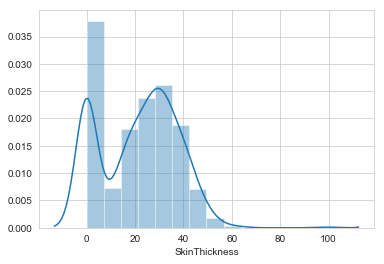

In [20]:
sns.distplot(health['SkinThickness'])

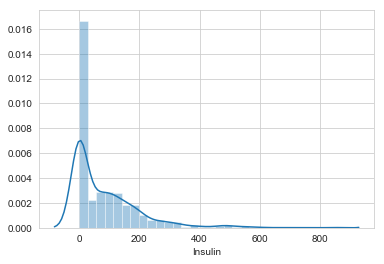

In [21]:
sns.distplot(health['Insulin'])

In [22]:
# Lets visualize the boxplot for skinthickness and insulin

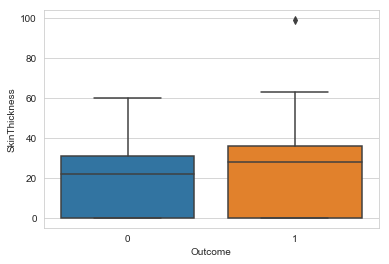

In [23]:
sns.boxplot(x="Outcome",y="SkinThickness",data=health)

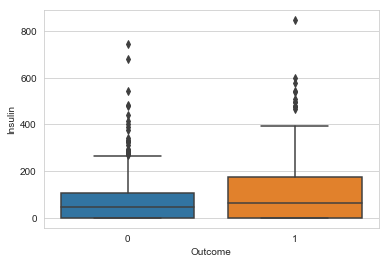

In [24]:
sns.boxplot(x="Outcome",y="Insulin",data=health)

In [25]:
# As we see that we have ouliers in both the cases so mean imputaion would be drastically affected by the ouliers 
# so we would do median imputation for Skin Thickness and Insulin to remove the missing values

In [26]:
from sklearn.impute import SimpleImputer

In [27]:
health['SkinThickness'] = health['SkinThickness'].replace(0,np.nan)

In [28]:
health['Insulin']=health['Insulin'].replace(0,np.nan)

In [29]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 724 non-null int64
Glucose                     724 non-null int64
BloodPressure               724 non-null int64
SkinThickness               532 non-null float64
Insulin                     392 non-null float64
BMI                         724 non-null float64
DiabetesPedigreeFunction    724 non-null float64
Age                         724 non-null int64
Outcome                     724 non-null int64
dtypes: float64(4), int64(5)
memory usage: 76.6 KB


In [30]:
health.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               192
Insulin                     332
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [31]:
health.fillna(health['SkinThickness'].median(),axis=1,inplace=True)

In [32]:
health.fillna(health['Insulin'].median(),axis=1,inplace=True)

In [33]:
health.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [34]:
health

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.0,29.0,33.6,0.627,50,1
1,1,85,66,29.0,29.0,26.6,0.351,31,0
2,8,183,64,29.0,29.0,23.3,0.672,32,1
3,1,89,66,23.0,94.0,28.1,0.167,21,0
4,0,137,40,35.0,168.0,43.1,2.288,33,1
5,5,116,74,29.0,29.0,25.6,0.201,30,0
6,3,78,50,32.0,88.0,31.0,0.248,26,1
8,2,197,70,45.0,543.0,30.5,0.158,53,1
10,4,110,92,29.0,29.0,37.6,0.191,30,0
11,10,168,74,29.0,29.0,38.0,0.537,34,1


In [35]:
# Lets Check the histogram 

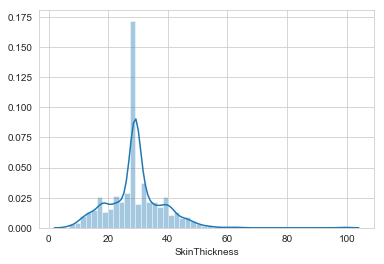

In [36]:
sns.distplot(health['SkinThickness'])

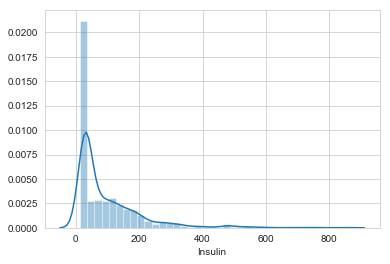

In [37]:
sns.distplot(health['Insulin'])

In [38]:
health.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,29.133978,97.792818,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,9.019267,107.942476,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,29.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [39]:
# So we can see that we a slighly normal distribution for Insulin and Skin Thickness after imputation

In [40]:
#Let us also remove the oulier datas for Skin Thickness greater than 60 and Insulin greater than 400

In [41]:
health=health[health['SkinThickness'] <= 60]

In [42]:
health = health[health['Insulin'] < 400]

In [43]:
health.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,3.890313,120.549858,72.384615,28.834758,85.559829,32.318661,0.467481,33.307692,0.334758
std,3.371982,30.018533,12.433685,8.480475,77.906314,6.809767,0.313073,11.689854,0.472242
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,25.000000,29.000000,27.400000,0.245000,24.000000,0.000000
50%,3.000000,115.500000,72.000000,29.000000,43.500000,32.050000,0.374500,29.000000,0.000000
75%,6.000000,139.000000,80.000000,32.000000,125.750000,36.500000,0.625500,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,392.000000,67.100000,2.288000,81.000000,1.000000


3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables.

In [44]:
# Now Lets create the countplot for the variables

In [45]:
health.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [46]:
health.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [47]:
health.dtypes.value_counts()

int64      5
float64    4
dtype: int64

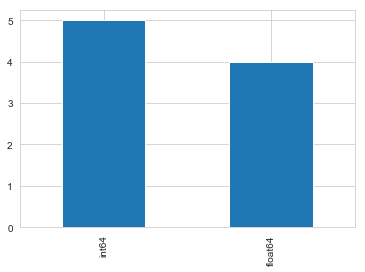

In [48]:
health.dtypes.value_counts().plot(kind="bar")

In [49]:
# So we see that we have 5 variables of int type and 4 of float type

## Data Exploration

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

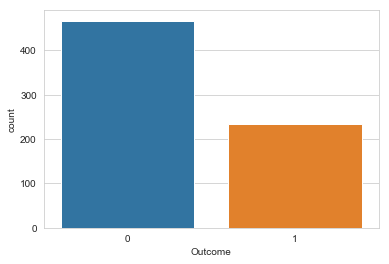

In [50]:
sns.countplot(x="Outcome",data=health)

In [51]:
# From this graph it is evident that the number of oucomes with class 1 is less than that for class 2

In [52]:
print("Percentage of Class 0 (People Not Having Diabetes)",(health[health['Outcome']==0].count()[0]/health['Outcome'].count())*100,"%")
print("Percentage of Class 1 (People Having Diabetes)",(health[health['Outcome']==1].count()[0]/health['Outcome'].count())*100,"%")

Percentage of Class 0 (People Not Having Diabetes) 66.52421652421653 %
Percentage of Class 1 (People Having Diabetes) 33.47578347578348 %


In [53]:
# So we can see that class 1 is nearly half of that of class 0

In [54]:
# we can either do Over-sampling / Under-Sampling of the data
# we can also use ensemble methods like Random Forest along with K-Fold cross validation technique to fix this issue

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

C:\Users\Dheeru\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Dheeru\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


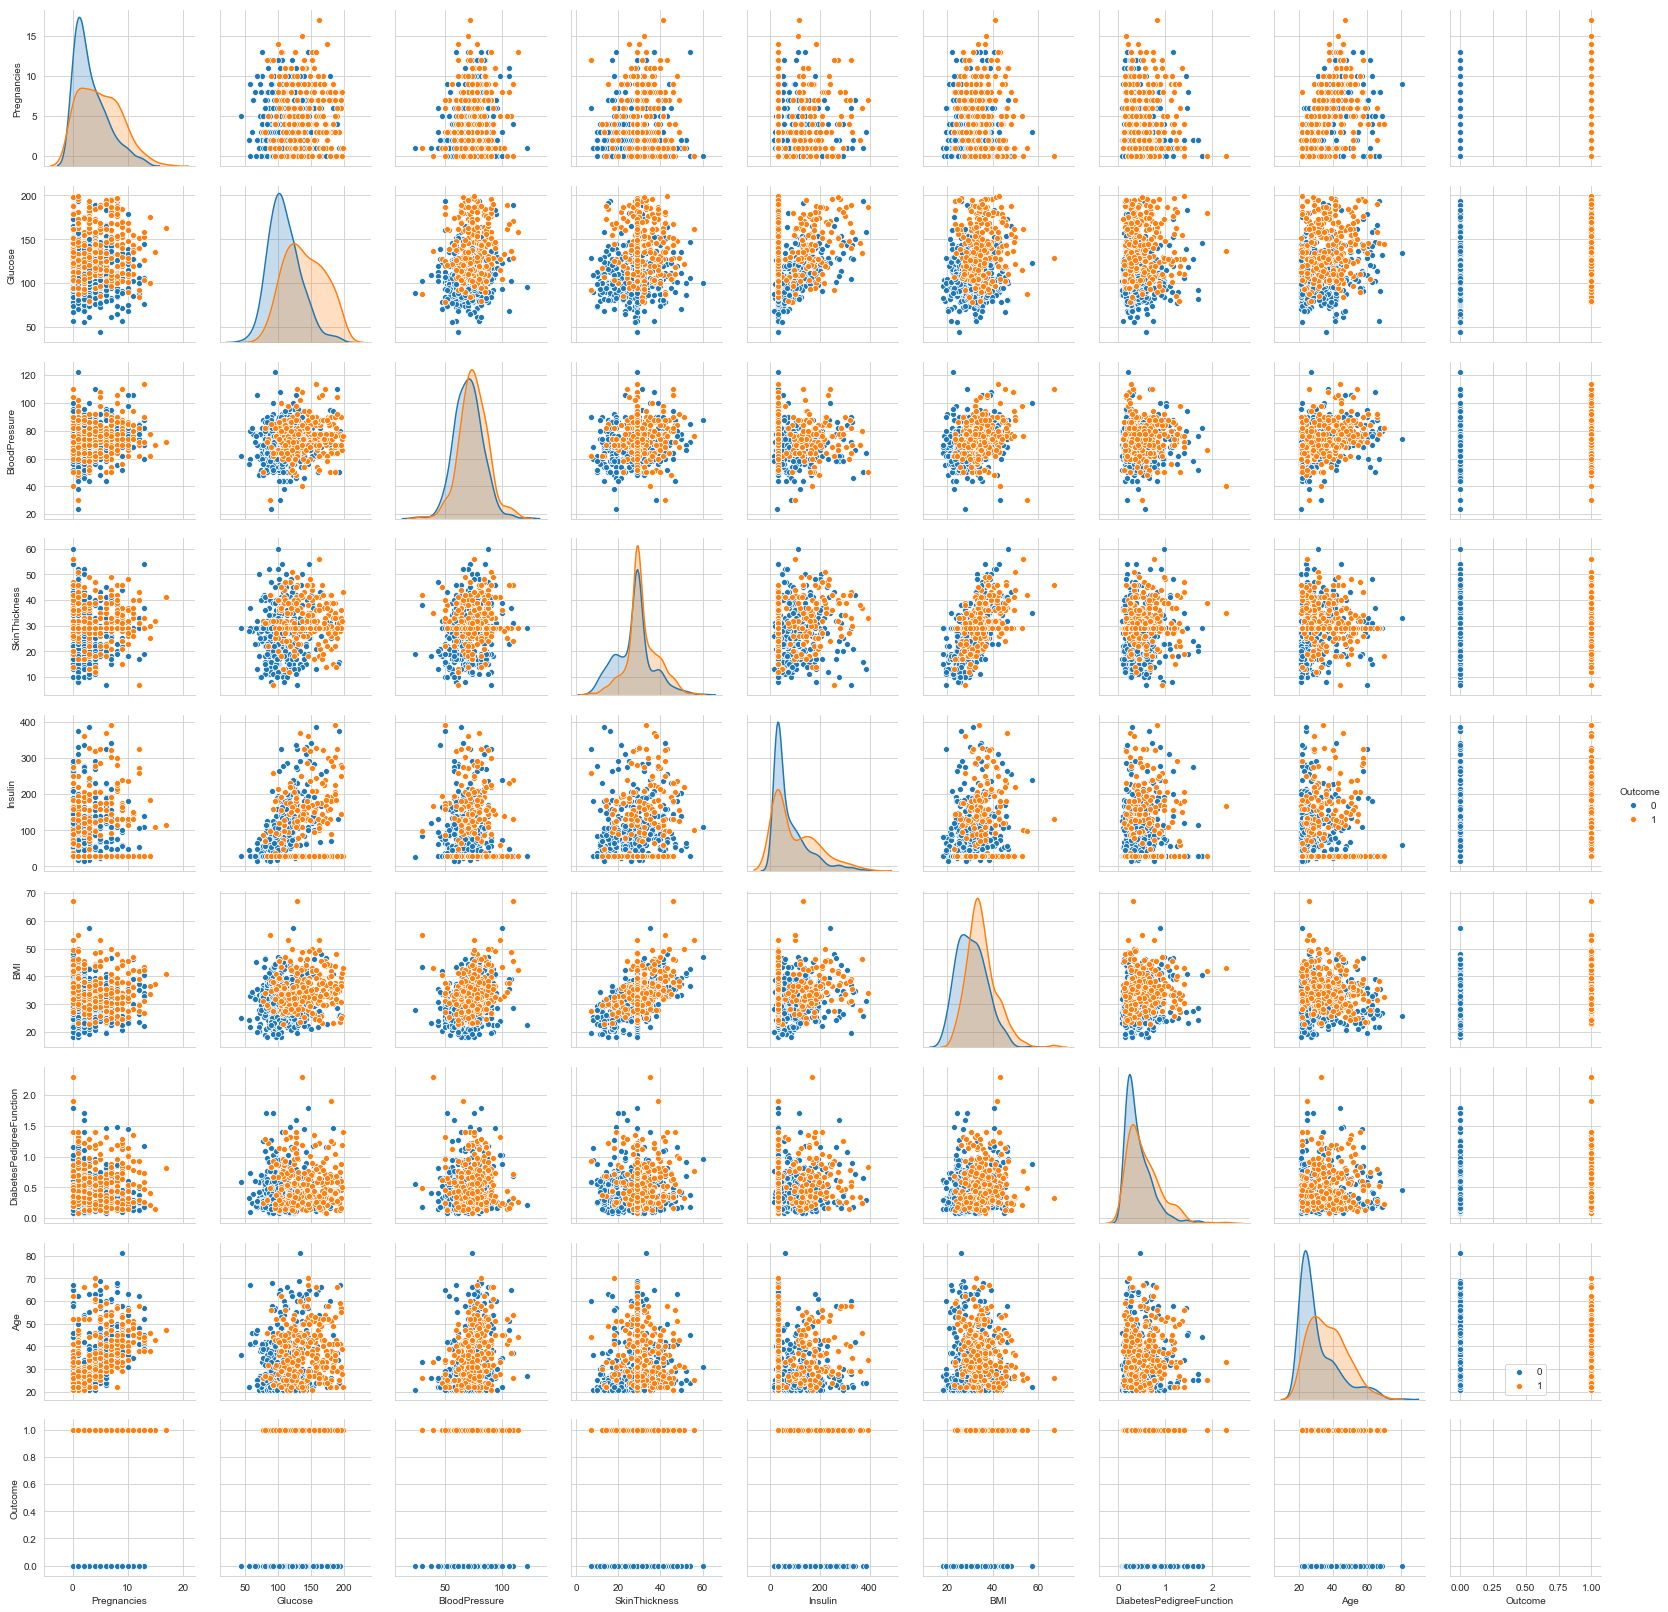

In [55]:
sns.pairplot(data=health,hue="Outcome")
plt.legend()

In [56]:
# here we can see the pairwise plots for all the variables.
# we see that SkinThickness and BMI have kind of a linear relationship among them
# In most of the cases the data looks pretty neatly separated into two groups

3. Perform correlation analysis. Visually explore it using a heat map.

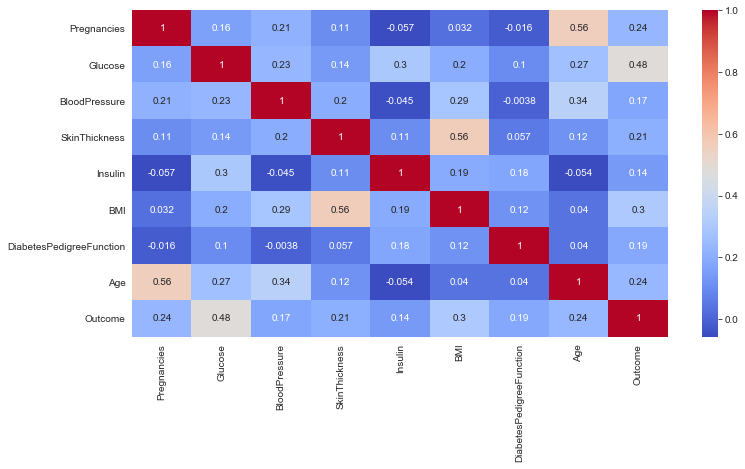

In [57]:
plt.figure(figsize=(12,6))
sns.heatmap(health.corr(),annot=True,cmap="coolwarm")

In [58]:
# We can see that there is not much strong positive correlation between some of the variables but some variables have 
# negative correlation with one another.

## Data Modeling

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.



In [196]:
# Thought Process:
# Here what we are doing is using 3 models for classification.
# The algorithms that would be used here are 
# 1) Knn
# 2) Logistic Regression
# 3) Random Forest
# 4) Adaboost 
# 5) SVM

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

3. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [60]:
# Lets try building a model with Knn (Please note that no sampling is applied here)

In [61]:
y=health['Outcome']
X=health.drop('Outcome',axis=1)

In [62]:
# As we saw from the summary the variables are of different scales .
# Let us try to Standardize the variables using Standard Scaler before splitting

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()

In [65]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [66]:
X_scaled = scaler.transform(X)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=101)

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=2)

In [72]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [73]:
predictions_knn = knn.predict(X_test)

In [74]:
# Now lets see the performance metrics

In [75]:
from sklearn.metrics import classification_report,confusion_matrix

In [76]:
print(confusion_matrix(y_test,predictions_knn))

[[85 10]
 [33 13]]


In [77]:
print(classification_report(y_test,predictions_knn))

              precision    recall  f1-score   support

           0       0.72      0.89      0.80        95
           1       0.57      0.28      0.38        46

    accuracy                           0.70       141
   macro avg       0.64      0.59      0.59       141
weighted avg       0.67      0.70      0.66       141



In [78]:
from sklearn.metrics import accuracy_score

In [79]:
accuracy_score(y_test,predictions_knn)

0.6950354609929078

In [80]:
# So we get a 69% precision using Knn with 2 neighbours 
# Lets see what the elbow plot gives us as a good k value

In [81]:
error_rate = []
for i in range(2,30):
    knn=KNeighborsClassifier(n_neighbors=i);
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(y_test != predictions))

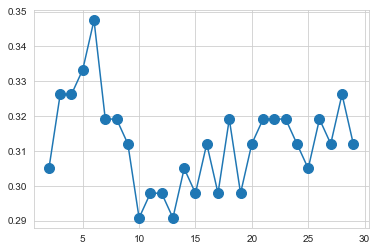

In [82]:
plt.plot(range(2,30),error_rate,marker="o",markersize=10)

In [83]:
# So we see that the minimum error occurs at k=2 so we have selected a good K-value for KNN

In [84]:
# Lets evaluate the various metrics for it

In [85]:
from sklearn.metrics import auc,roc_curve

In [86]:
def model_classification_report(test_data,predictions):
    c = confusion_matrix(test_data,predictions)
    precision = c[0][0] / (c[0][0]+c[1][0])
    specificity = c[1][1] / (c[1][1]+c[0][1])
    sensitivity = c[0][0] / (c[0][0]+c[0][1])
    accuracy = ((c[0][0]+c[1][1]) / (c[0][0]+c[1][1]+c[0][1]+c[1][0]))
    f1score = (2 * sensitivity * precision) / (sensitivity+precision)
    fpr,tpr,threshold=roc_curve(test_data,predictions)
    roc_auc = auc(fpr,tpr)
    
    # printing the various metrics
    print("True Positive Rate/ Sensitivity = ",sensitivity)
    print("Specificity = ",specificity)
    print("Precision = ",precision)
    print("F1-Score = ",f1score)
    print("Accuracy = ",accuracy)
    
    # Creating the Roc Curve
    plt.title("ROC Curve")
    plt.plot(fpr,tpr,label='AUC = %0.2f' %roc_auc)
    plt.legend()
    plt.plot([0,1],[0,1],'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.show()

In [137]:
# We see that error is minimum at k = 10 . So lets build a model with 10 neighbours and analyse the perfoemance

In [138]:
knn = KNeighborsClassifier(n_neighbors=10)

In [139]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [140]:
predictions_knn = knn.predict(X_test)

True Positive Rate/ Sensitivity =  0.8631578947368421
Specificity =  0.5806451612903226
Precision =  0.7454545454545455
F1-Score =  0.7999999999999999
Accuracy =  0.7092198581560284


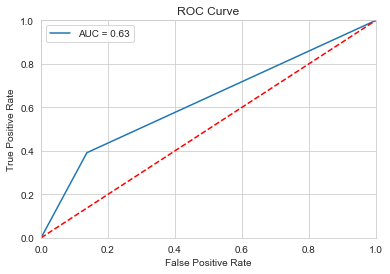

In [141]:
model_classification_report(y_test,predictions_knn)

In [142]:
# So we are getting a precision of 74% with an accuracy of 71%  (This metrics were perfoemed on a uniform data)
# we also got area under the curve to be 0.63 
# these metrics are betters than for k =2

In [89]:
# Lets now use an emsemble technique to build a model

In [90]:
# Here we would be using Random Forest for classification

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf = RandomForestClassifier(n_estimators=5)

In [93]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
predictions_rf = rf.predict(X_test)

True Positive Rate/ Sensitivity =  0.7789473684210526
Specificity =  0.43243243243243246
Precision =  0.7115384615384616
F1-Score =  0.7437185929648242
Accuracy =  0.6382978723404256


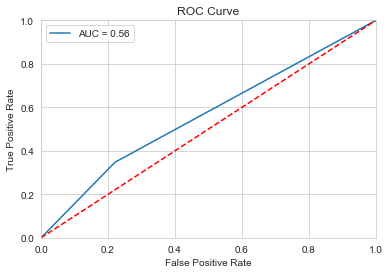

In [95]:
model_classification_report(y_test,predictions_rf)

In [96]:
# Now Lets create a model by doing some Hyperparameter tuning of the various options of random fprest to see if we
# can somehow increase the accuracy or not.

In [97]:
rfc=RandomForestClassifier()

In [98]:
param_grid = {'max_depth':[4,8,10,20,30],
              'min_samples_leaf':range(10,100,10),
              'min_samples_split':range(50,200,50),
              'n_estimators':[10,20,30],
              'max_features':range(5,9),
              'class_weight':[None,"balanced","balanced_subsample"]
    
}

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
grid_Search = GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=1,n_jobs=-1)

In [101]:
grid_Search.fit(X_train,y_train)

Fitting 3 folds for each of 4860 candidates, totalling 14580 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done 3248 tasks      | elapsed:   47.4s
[Parallel(n_jobs=-1)]: Done 6048 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 9648 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 11972 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 14580 out of 14580 | elapsed:  5.0min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [102]:
print("We are getting accuracy of ",grid_Search.best_score_," using ",grid_Search.best_params_)

We are getting accuracy of  0.8092691622103387  using  {'class_weight': None, 'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 10, 'min_samples_split': 50, 'n_estimators': 10}


In [103]:
# Now Lets fit our Random Forst Tree with these parameters and balancing the weights

In [143]:
rfc = RandomForestClassifier(max_depth=8,max_features=5,min_samples_leaf=10,min_samples_split=50,n_estimators=10)

In [144]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [145]:
predictions_rfc=rfc.predict(X_test)

True Positive Rate/ Sensitivity =  0.8315789473684211
Specificity =  0.5555555555555556
Precision =  0.7523809523809524
F1-Score =  0.79
Accuracy =  0.7021276595744681


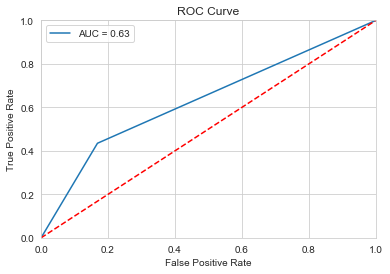

In [146]:
model_classification_report(y_test,predictions_rfc)

In [147]:
# So we can see that even with some hyperparameter tuning our accuracy has increased using random forest

In [109]:
# Let us try to use logistic regression to predict the classes

In [110]:
from sklearn.linear_model import LogisticRegression

In [111]:
logit = LogisticRegression()

In [112]:
logit.fit(X_train,y_train)

C:\Users\Dheeru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [113]:
predictions_log=logit.predict(X_test)

True Positive Rate/ Sensitivity =  0.8526315789473684
Specificity =  0.5625
Precision =  0.7431192660550459
F1-Score =  0.7941176470588235
Accuracy =  0.7021276595744681


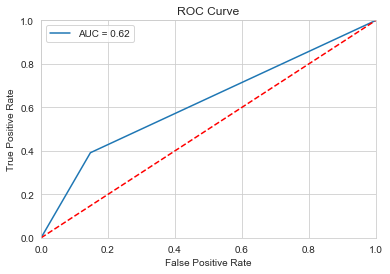

In [114]:
model_classification_report(y_test,predictions_log)

In [115]:
# Our Accuracy seems to have imroved 

In [116]:
#Let us create another logistic model by balancing the classes

In [117]:
logit2 = LogisticRegression(class_weight="balanced")

In [118]:
logit2.fit(X_train,y_train)

C:\Users\Dheeru\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [119]:
predictions_log2 = logit2.predict(X_test)

True Positive Rate/ Sensitivity =  0.7473684210526316
Specificity =  0.5471698113207547
Precision =  0.8068181818181818
F1-Score =  0.7759562841530054
Accuracy =  0.7092198581560284


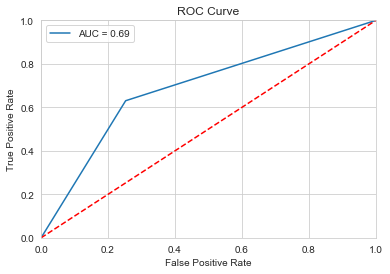

In [120]:
model_classification_report(y_test,predictions_log2)

In [148]:
# So in this case our ROC has increased to about 69% without affecting the accuracy.

In [122]:
# Lets try to build a model using the adaboost method

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
tree = DecisionTreeClassifier(max_depth=2,random_state=100,class_weight="balanced")

In [125]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [126]:
predictions_tree = tree.predict(X_test)

In [127]:
accuracy_score(y_test,predictions_tree)

0.6099290780141844

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
n_estimators=list(range(1,100,3))
abc_scores = []
for n_est in n_estimators:
    ABC = AdaBoostClassifier(n_estimators=n_est,base_estimator=tree)
    ABC.fit(X_train,y_train)
    predictions_ABC=ABC.predict(X_test)
    acc_score=accuracy_score(y_test,predictions_ABC)
    abc_scores.append(acc_score)

Text(0.5, 1.0, 'Adaboost Classifier')

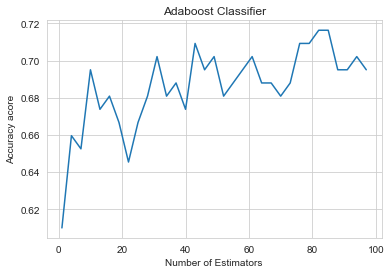

In [130]:
plt.plot(n_estimators,abc_scores)
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy acore")
plt.title("Adaboost Classifier")

In [131]:
ABC = AdaBoostClassifier(n_estimators=80,base_estimator=tree)

In [132]:
ABC.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=100,
                        

In [133]:
predictions_ABC = ABC.predict(X_test)

True Positive Rate/ Sensitivity =  0.8
Specificity =  0.525
Precision =  0.7524752475247525
F1-Score =  0.7755102040816327
Accuracy =  0.6879432624113475


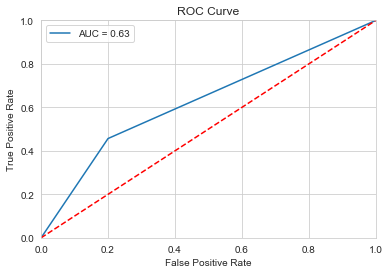

In [134]:
model_classification_report(y_test,predictions_ABC)

In [135]:
# Let us try to build one last model using SVM

In [136]:
from sklearn.svm import SVC

In [149]:
svcmodel=SVC()

In [150]:
svcmodel.fit(X_train,y_train)

C:\Users\Dheeru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [151]:
predictions_svc=svcmodel.predict(X_test)

True Positive Rate/ Sensitivity =  0.8421052631578947
Specificity =  0.5454545454545454
Precision =  0.7407407407407407
F1-Score =  0.7881773399014779
Accuracy =  0.6950354609929078


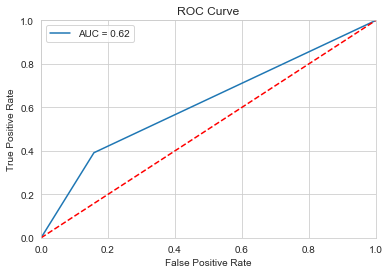

In [152]:
model_classification_report(y_test,predictions_svc)

In [154]:
# Lets try to find better SVC parameters using Kfold technique tuning

In [155]:
from sklearn.model_selection import KFold

In [156]:
folds = KFold(n_splits=5,shuffle=True,random_state=4)

In [157]:
svc = SVC()

In [158]:
from sklearn.model_selection import cross_val_score

In [165]:
cv_results=cross_val_score(svc,X_train,y_train,cv=folds,scoring='accuracy')

C:\Users\Dheeru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dheeru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dheeru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Dheeru\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

In [166]:
print(cv_results)

[0.72566372 0.78571429 0.83928571 0.75892857 0.76785714]


In [167]:
print("Mean Accuracy = ",cv_results.mean())

Mean Accuracy =  0.7754898862199748


In [168]:
# Lets do some Hyperparameter tuning

In [172]:
import warnings
warnings.filterwarnings("ignore")

In [173]:
params = {"C":[0.1,1,10,100,1000]}
scores = ["accuracy","precision","recall"]
for score in scores:
    print("Tuning Hyperparameter for ",score)
    
    clf=GridSearchCV(estimator=SVC(),param_grid=params,cv=folds,scoring=score,return_train_score=True,n_jobs=-1)
    clf.fit(X_train,y_train)
    print(f"The highest {score} score is {clf.best_score_} at C = {clf.best_params_}")
    print("\n")

Tuning Hyperparameter for  accuracy
The highest accuracy score is 0.7754010695187166 at C = {'C': 1}


Tuning Hyperparameter for  precision
The highest precision score is 0.8145714851597204 at C = {'C': 0.1}


Tuning Hyperparameter for  recall
The highest recall score is 0.5864355634800397 at C = {'C': 100}




In [185]:
svc = SVC(kernel='linear',C=1,class_weight="balanced")

In [186]:
svc.fit(X_train,y_train)

SVC(C=1, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [187]:
scores = cross_val_score(svc,X_train,y_train,cv=folds)
print(scores)

[0.71681416 0.77678571 0.77678571 0.77678571 0.80357143]


In [188]:
svc_predictions = svc.predict(X_test)

True Positive Rate/ Sensitivity =  0.7578947368421053
Specificity =  0.54
Precision =  0.7912087912087912
F1-Score =  0.7741935483870969
Accuracy =  0.7021276595744681


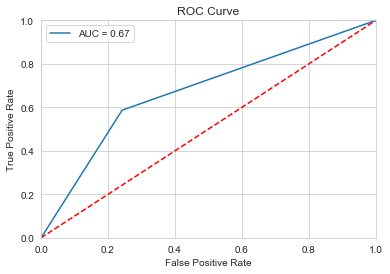

In [189]:
model_classification_report(y_test,svc_predictions)

### In conclusion , we found that the logistic regression for a balanced model gave us the best model with
### Accuracy =f 71%
### AOC = 69%
### True Positive Rate = 85%

### So Logistic Model is best fit for classification of this dataset.